# DATA MINING LAB PROJECT || DengAI: Predicting Disease Spread

---



# 213902017 || SHAHIDUL

---



# Code Implementation & Output

In [83]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

# A Tale of Two Cities

In [84]:
# load the provided data
train_features = pd.read_csv('dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('dengue_labels_train.csv',
                           index_col=[0,1,2])

In [85]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [86]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [87]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [88]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

In [89]:

#Normalized Difference Vegetation Index

# Null check
pd.isnull(sj_train_features).any()



,0
ndvi_ne,True
ndvi_nw,True
ndvi_se,True
ndvi_sw,True
precipitation_amt_mm,True
reanalysis_air_temp_k,True
reanalysis_avg_temp_k,True
reanalysis_dew_point_temp_k,True
reanalysis_max_air_temp_k,True
reanalysis_min_air_temp_k,True


Text(0.5, 0, 'Time')

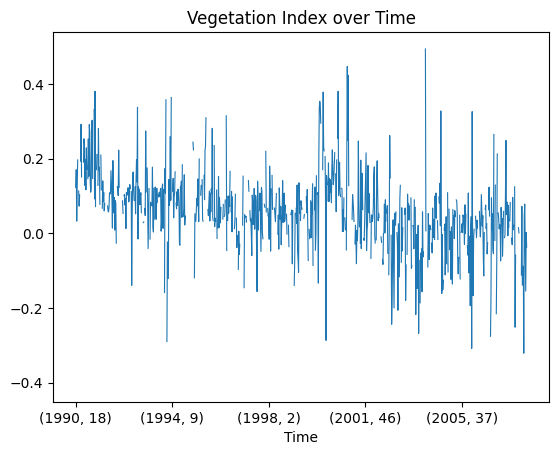

In [90]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [91]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

Distribution of labels

In [92]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


array([[<Axes: title={'center': 'total_cases'}>]], dtype=object)

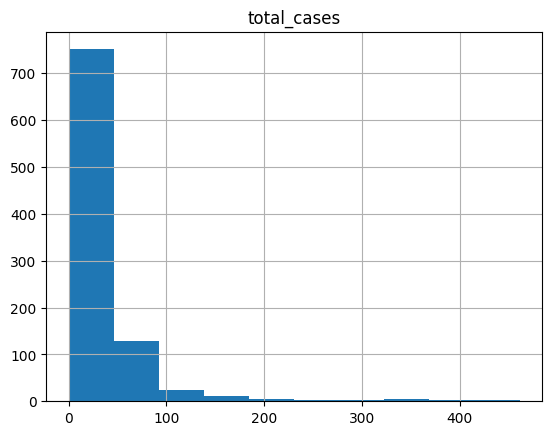

In [93]:
sj_train_labels.hist()

array([[<Axes: title={'center': 'total_cases'}>]], dtype=object)

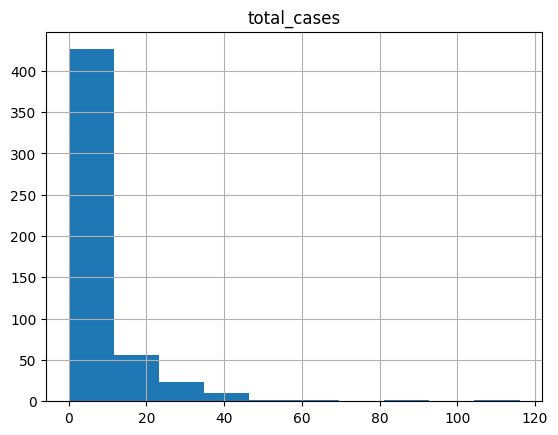

In [94]:
iq_train_labels.hist()

Which inputs strongly correlate with total_cases?

In [95]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [96]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

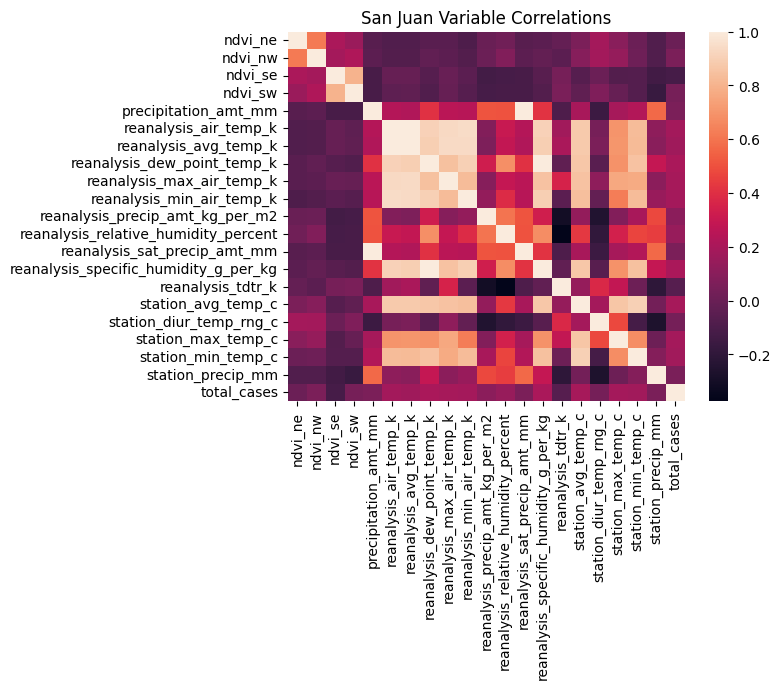

In [97]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

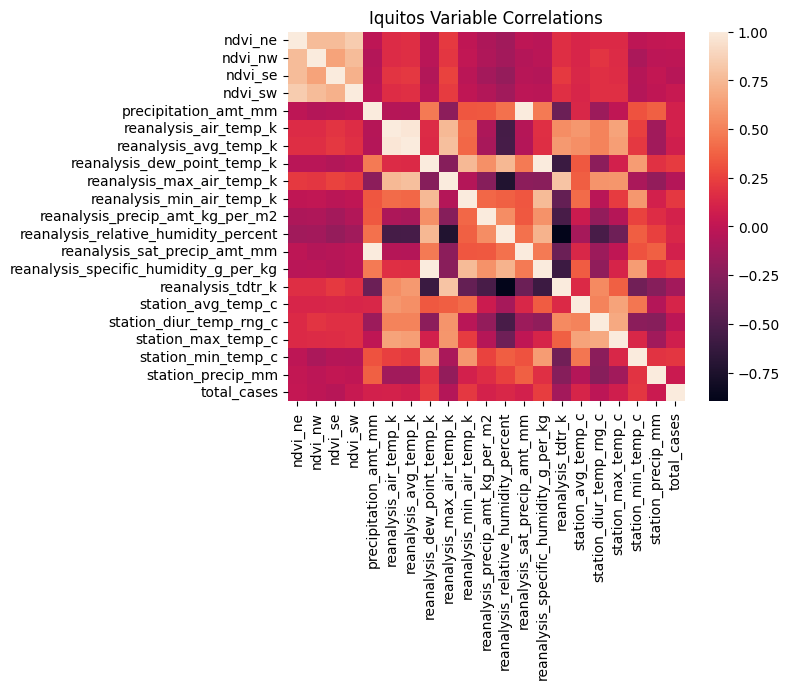

In [98]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

Many of the temperature data are strongly correlated, which is expected. But the total_cases variable doesn't have many obvious strong correlations.

<Axes: >

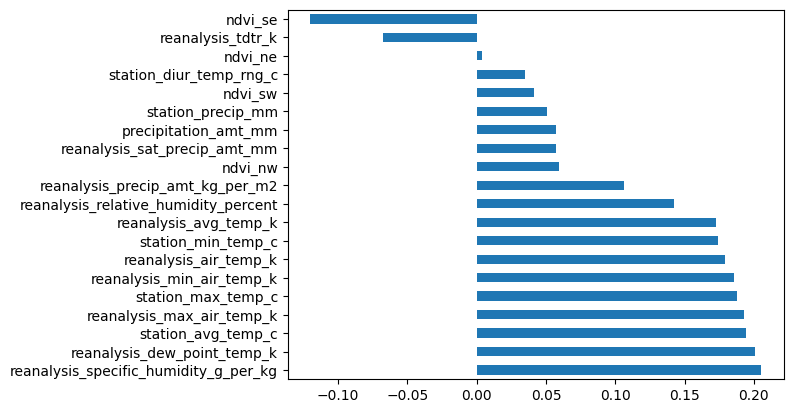

In [99]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

<Axes: >

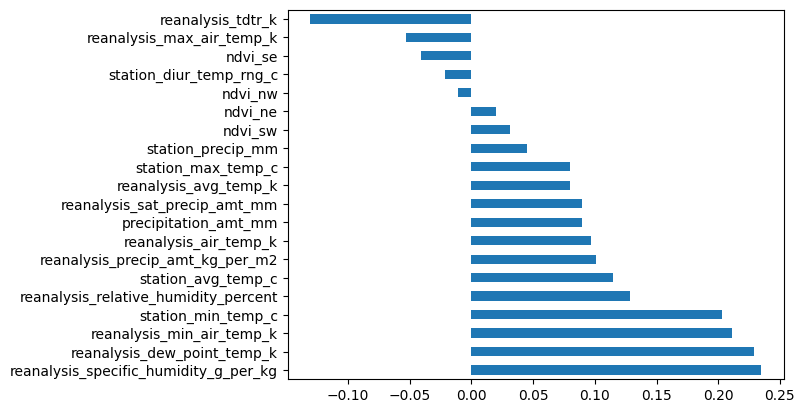

In [100]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

# A mosquito model

In [101]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])

    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg',
                 'reanalysis_dew_point_temp_k',
                 'station_avg_temp_c',
                 'station_min_temp_c']
    df = df[features]

    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)

    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']

    return sj, iq

In [102]:
sj_train, iq_train = preprocess_data('dengue_features_train.csv',
                                    labels_path="dengue_labels_train.csv")

In [103]:
sj_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000
mean,16.547535,295.104736,26.999191,22.594017,34.180556
std,1.560663,1.570075,1.415079,1.506281,51.381372
min,11.715714,289.642857,22.842857,17.800000,0.000000
25%,15.233571,293.843929,25.842857,21.700000,9.000000
50%,16.835000,295.451429,27.214286,22.800000,19.000000
75%,17.854286,296.415714,28.175000,23.900000,37.000000
max,19.440000,297.795714,30.071429,25.600000,461.000000


In [104]:
iq_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,total_cases
count,520.000000,520.000000,520.000000,520.000000,520.000000
mean,17.102019,295.498723,27.506331,21.210385,7.565385
std,1.443048,1.414360,0.908973,1.257734,10.765478
min,12.111429,290.088571,21.400000,14.700000,0.000000
25%,16.121429,294.596429,26.957500,20.600000,1.000000
50%,17.428571,295.852143,27.587500,21.400000,5.000000
75%,18.180357,296.557143,28.075000,22.000000,9.000000
max,20.461429,298.450000,30.800000,24.200000,116.000000


Split it up!

In [105]:
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

Training time

In [106]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"

    grid = 10 ** np.arange(-8, -3, dtype=np.float64)

    best_alpha = []
    best_score = 1000

    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)

    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model

sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  1e-08
best score =  22.080882352941178
best alpha =  1e-08
best score =  6.466666666666667


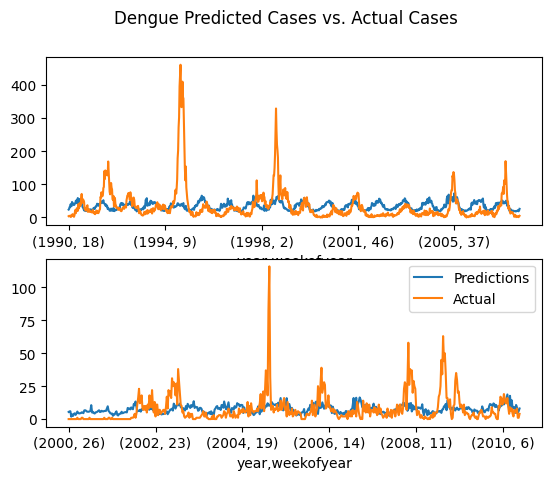

In [107]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

# Run the Ensemble model and visualize its performance --- MY PART --- (with instructions)

 Step 1: Install Required Libraries

In [108]:
!pip install xgboost lightgbm scikit-learn pandas matplotlib
!pip install lightgbm statsmodels --quiet


Step 2: Import Packages

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.api as sm
from statsmodels.genmod.families import NegativeBinomial


Step 3: Load and Merge Data

In [110]:
features = pd.read_csv("dengue_features_train.csv")
labels   = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv('dengue_features_test.csv')

In [111]:
df = features.merge(labels, on=['city', 'year', 'weekofyear'])

# Fill missing values (basic)
df.fillna(method='ffill', inplace=True)

# Encode city
df['city'] = df['city'].map({'sj': 0, 'iq': 1})

# Add week index to track
df['week_idx'] = range(len(df))


Step 4: Feature Engineering

In [112]:
features = df.drop(['total_cases'], axis=1)
target = df['total_cases']

# Drop non-numeric
X = features.drop(columns=['year', 'weekofyear', 'week_start_date'])
y = target

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Save week_idx for plots
X_val['week_idx'] = X_val['week_idx']


Step 5: Negative Binomial Regression

In [113]:
X_train_nb = sm.add_constant(X_train)
X_val_nb = sm.add_constant(X_val, has_constant='add')

nb_model = sm.GLM(y_train, X_train_nb, family=NegativeBinomial()).fit()
y_pred_nb = nb_model.predict(X_val_nb)


Step 6: Ensemble Stacking Model

In [114]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lgbm = LGBMRegressor(random_state=42)

stack = StackingRegressor(
    estimators=[('lr', lr), ('rf', rf), ('lgbm', lgbm)],
    final_estimator=GradientBoostingRegressor(n_estimators=100),
    passthrough=True,
    cv=5
)

stack.fit(X_train, y_train)
y_pred_ensemble = stack.predict(X_val)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4664
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 22
[LightGBM] [Info] Start training from score 23.116838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4642
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 22
[LightGBM] [Info] Start training from score 23.427497
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4640
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 22
[LightGBM] [Info] Start traini

Step 7: Metric Calculation

In [115]:
from sklearn.metrics import r2_score

def safe_mape(y_true, y_pred, min_denom=10):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), min_denom))) * 100

def accuracy_like_score(y_true, y_pred):
    return 100 - safe_mape(y_true, y_pred)

# Mean Absolute Error
mae_nb = mean_absolute_error(y_val, y_pred_nb)
mae_ens = mean_absolute_error(y_val, y_pred_ensemble)

# Improved Mean Absolute Percentage Error
mape_nb = safe_mape(y_val, y_pred_nb)
mape_ens = safe_mape(y_val, y_pred_ensemble)

# Accuracy-like %
acc_nb = accuracy_like_score(y_val, y_pred_nb)
acc_ens = accuracy_like_score(y_val, y_pred_ensemble)

# R2 Score (optional)
r2_nb = r2_score(y_val, y_pred_nb)
r2_ens = r2_score(y_val, y_pred_ensemble)

# Print
print(f"{'Model':<20} {'MAE':>10} {'MAPE (%)':>12} {'Acc-like (%)':>15} {'R2 Score':>12}")
print("-" * 75)
print(f"{'Negative Binomial':<20} {mae_nb:10.2f} {mape_nb:12.2f} {acc_nb:15.2f} {r2_nb:12.3f}")
print(f"{'Ensemble Stacker':<20} {mae_ens:10.2f} {mape_ens:12.2f} {acc_ens:15.2f} {r2_ens:12.3f}")


Model                       MAE     MAPE (%)    Acc-like (%)     R2 Score
---------------------------------------------------------------------------
Negative Binomial         22.65        75.96           24.04        0.201
Ensemble Stacker          12.09        40.92           59.08        0.779


# Visual Comparisons - Negative Binomial vs Ensemble Stacker with Original Result

# Line Plot Comparison

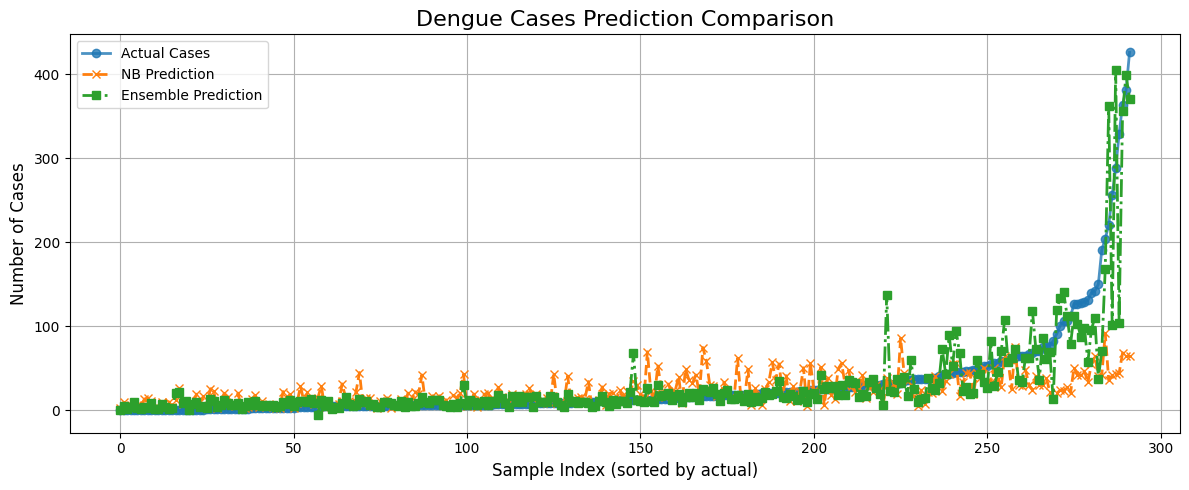

In [116]:



import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': y_val,
    'Negative Binomial': y_pred_nb,
    'Ensemble': y_pred_ensemble
}).reset_index(drop=True)

# Sort by actual cases to make the trend visible (optional)
plot_df = plot_df.sort_values(by='Actual').reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(plot_df['Actual'], label='Actual Cases', linewidth=2, marker='o', alpha=0.8)
plt.plot(plot_df['Negative Binomial'], label='NB Prediction', linewidth=2, linestyle='--', marker='x')
plt.plot(plot_df['Ensemble'], label='Ensemble Prediction', linewidth=2, linestyle='-.', marker='s')

plt.title('Dengue Cases Prediction Comparison', fontsize=16)
plt.xlabel('Sample Index (sorted by actual)', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot first 50 samples only (optional zoom)
plot_df_subset = plot_df.head(50)


# Scatter Plot Comparison

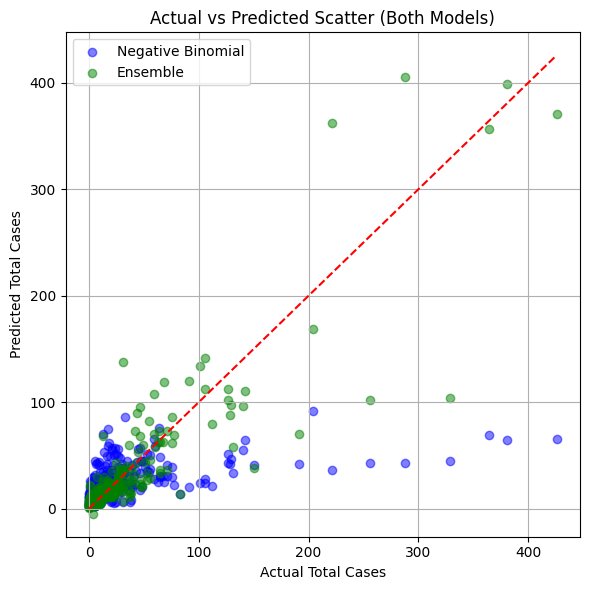

In [117]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_nb, alpha=0.5, label='Negative Binomial', color='blue')
plt.scatter(y_val, y_pred_ensemble, alpha=0.5, label='Ensemble', color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Total Cases")
plt.ylabel("Predicted Total Cases")
plt.title("Actual vs Predicted Scatter (Both Models)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Seaborn Version (Cleaner Static Plot Comparison)

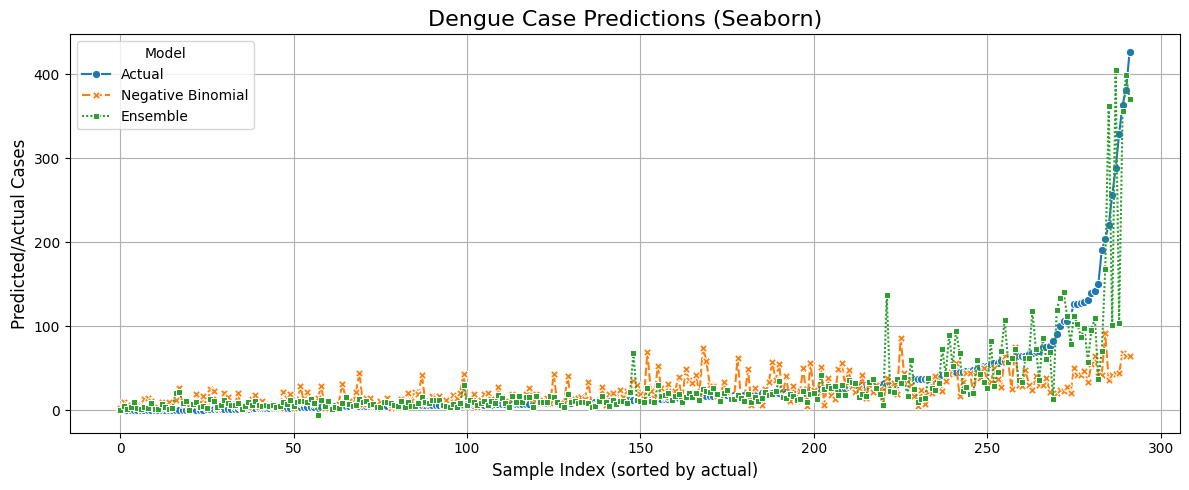

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create and sort DataFrame
plot_df = pd.DataFrame({
    'Actual': y_val,
    'Negative Binomial': y_pred_nb,
    'Ensemble': y_pred_ensemble
}).reset_index(drop=True).sort_values(by='Actual').reset_index(drop=True)

# Melt for Seaborn
df_melted = plot_df.melt(var_name='Model', value_name='Cases')

# Add index column for x-axis
df_melted['Sample'] = df_melted.groupby('Model').cumcount()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_melted, x='Sample', y='Cases', hue='Model', style='Model', markers=True, dashes=True)

plt.title('Dengue Case Predictions (Seaborn)', fontsize=16)
plt.xlabel('Sample Index (sorted by actual)', fontsize=12)
plt.ylabel('Predicted/Actual Cases', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotly Version Comparison (Interactive Plot)

In [119]:
import plotly.graph_objects as go
import pandas as pd

# Prepare Data
plot_df = pd.DataFrame({
    'Actual': y_val,
    'Negative Binomial': y_pred_nb,
    'Ensemble': y_pred_ensemble
}).reset_index(drop=True).sort_values(by='Actual').reset_index(drop=True)

# Create Plotly figure
fig = go.Figure()

fig.add_trace(go.Scatter(y=plot_df['Actual'], mode='lines+markers', name='Actual', line=dict(width=2)))
fig.add_trace(go.Scatter(y=plot_df['Negative Binomial'], mode='lines+markers', name='NB Prediction', line=dict(dash='dash')))
fig.add_trace(go.Scatter(y=plot_df['Ensemble'], mode='lines+markers', name='Ensemble Prediction', line=dict(dash='dot')))

fig.update_layout(
    title='Dengue Case Predictions (Interactive Plot)',
    xaxis_title='Sample Index (sorted by actual)',
    yaxis_title='Number of Cases',
    legend_title='Model',
    width=1000,
    height=500
)

fig.show()
